<a href="https://colab.research.google.com/github/mitacrane/capstone1/blob/main/capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Real Estate Investment Data Exploration
# Mita Crane

#The dataset includes data for property sales in Washington state in 2014,
#likely derived from data published by the Washington Center for Real Estate Research.
#The data includes property sale date; price; year built and renovated; number of bedrooms,
# bathrooms, and floors; square footage of the living area and the lot; ratings of the property’s
#view and condition; whether the property faces a waterfront; the square footage of the living area above-ground,
# square footage of the basement; address, city, zipcode, and country. The data for property sales ranges from May 2014 to July 2014.
#The dataset contains numerical data, both discrete and continuous, ordinal and nominal categorical data, and binary data.


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import io
import zipfile

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Download the dataset using kagglehub
print("Attempting to download the dataset from Kaggle...")

try:
    # Using kagglehub to download the dataset
    import kagglehub
    # Download latest version
    path = kagglehub.dataset_download("fratzcan/usa-house-prices")
    print("Path to dataset files:", path)

    # Find the CSV file in the downloaded directory
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    if csv_files:
        csv_path = os.path.join(path, csv_files[0])
        print(f"Found CSV file: {csv_files[0]}")
        df = pd.read_csv(csv_path)
        print("Dataset successfully loaded from Kaggle")
    else:
        raise FileNotFoundError("No CSV file found in the downloaded dataset")

except Exception as e:
    print(f"Could not download from Kaggle directly: {str(e)}")




Attempting to download the dataset from Kaggle...


100%|██████████| 119k/119k [00:00<00:00, 41.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1
Found CSV file: USA Housing Dataset.csv
Dataset successfully loaded from Kaggle


Summary Statistics for Numeric Attributes:
                                date         price     bedrooms    bathrooms   sqft_living      sqft_lot       floors   waterfront         view    condition   sqft_above  sqft_basement     yr_built  yr_renovated    year        month  Price_Per_SqFt
count                           4140  4.140000e+03  4140.000000  4140.000000   4140.000000  4.140000e+03  4140.000000  4140.000000  4140.000000  4140.000000  4140.000000    4140.000000  4140.000000   4140.000000  4140.0  4140.000000     4140.000000
mean   2014-06-10 16:24:41.739130368  5.530629e+05     3.400483     2.163043   2143.638889  1.469764e+04     1.514130     0.007488     0.246618     3.452415  1831.351449     312.287440  1970.814010    808.368357  2014.0     5.841787      265.840195
min              2014-05-02 00:00:00  0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02     1.000000     0.000000     0.000000     1.000000   370.000000       0.000000  1900.000000      0.00000

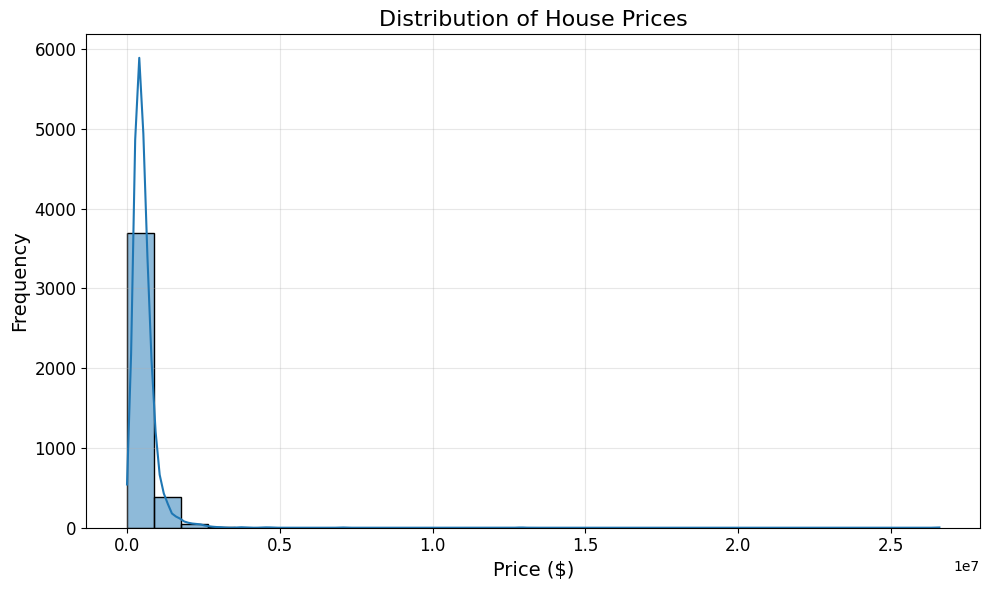

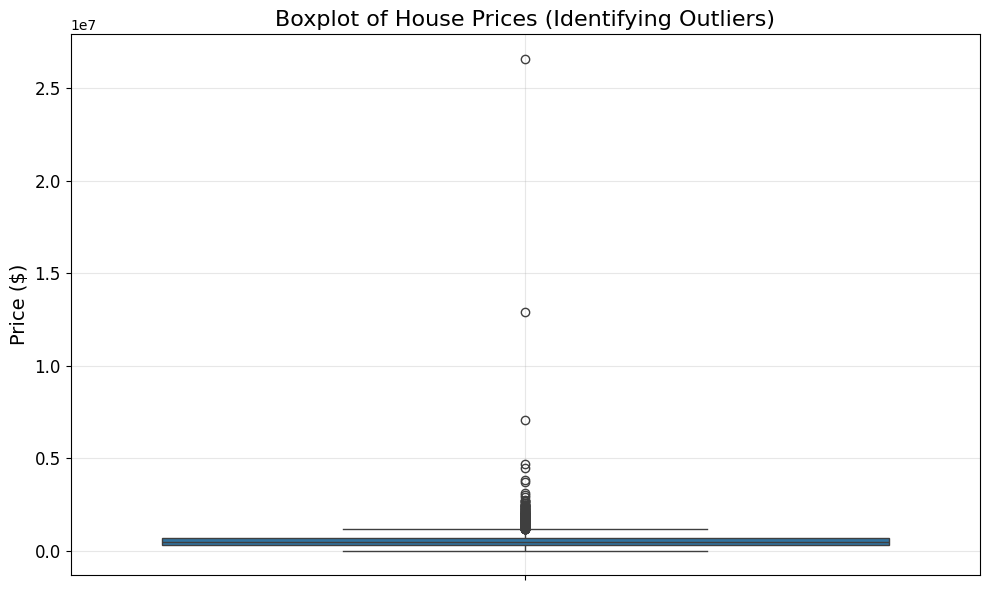

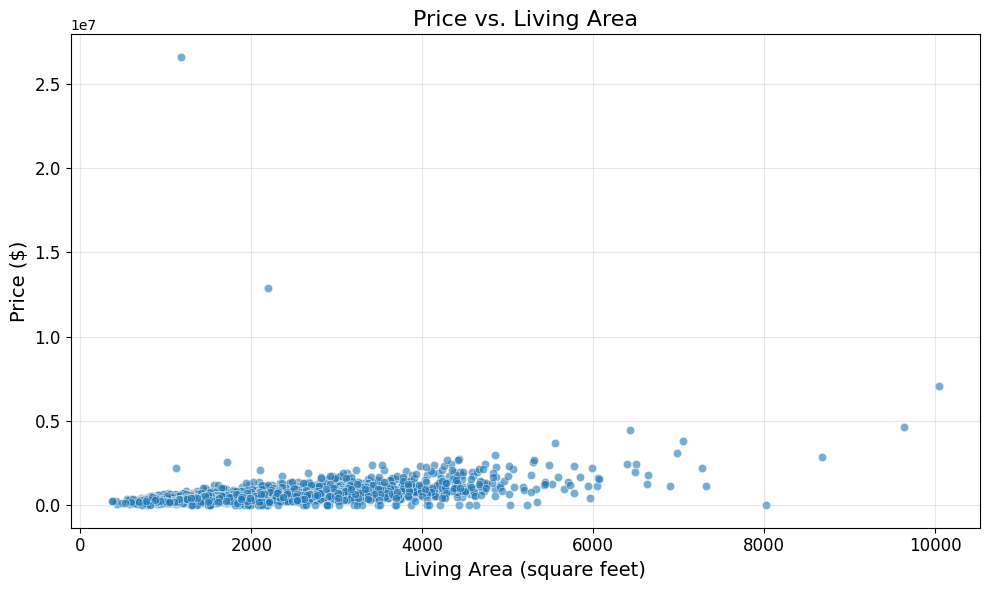

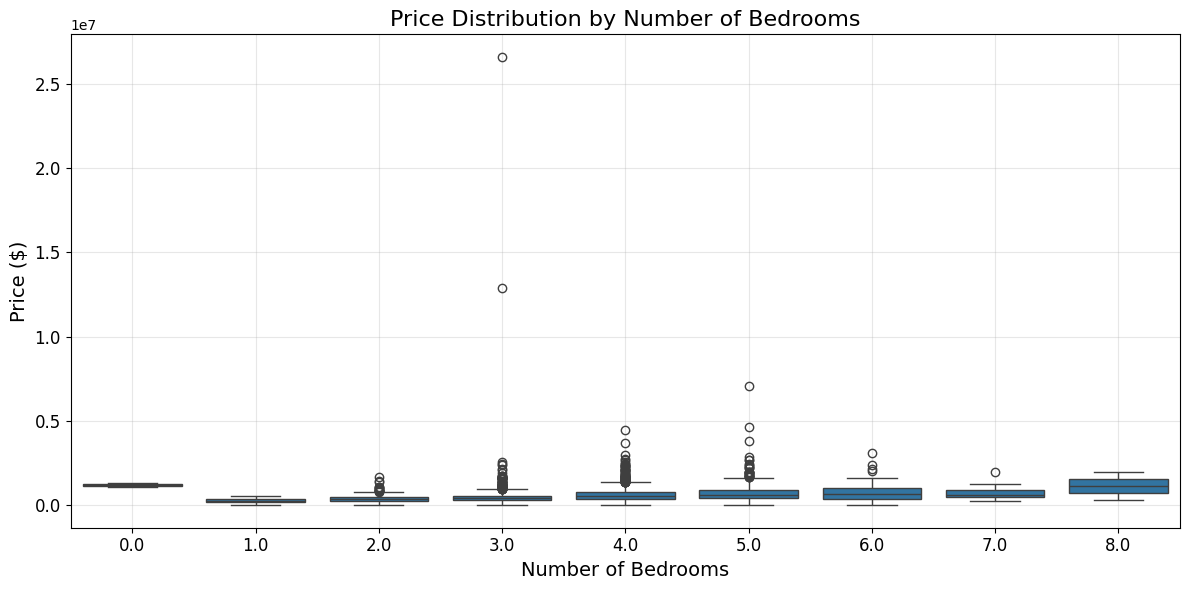

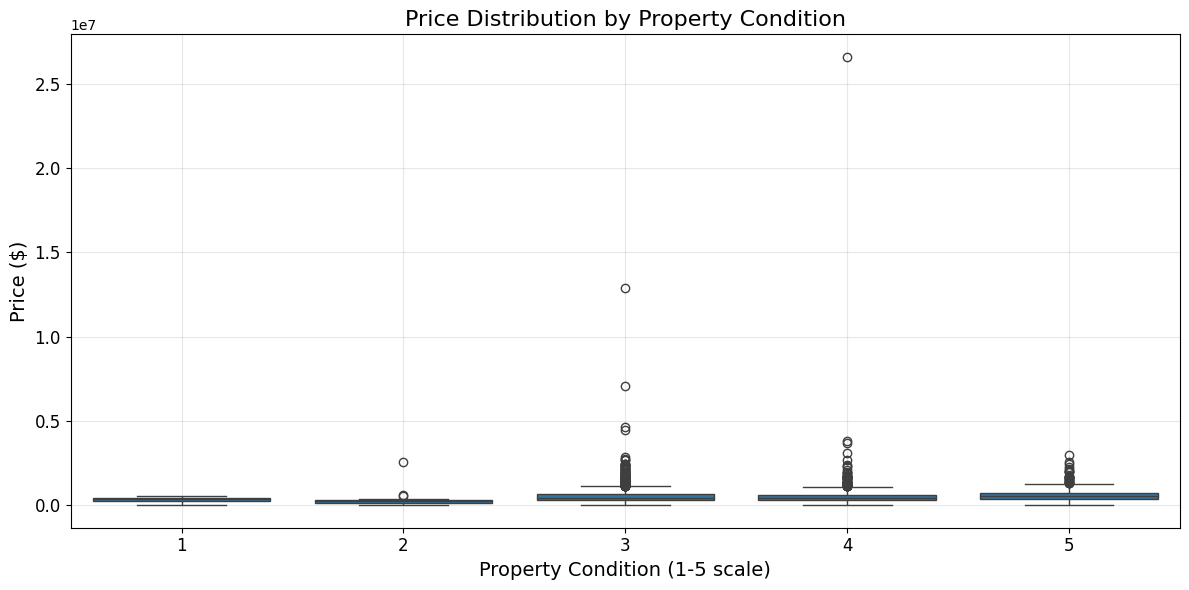

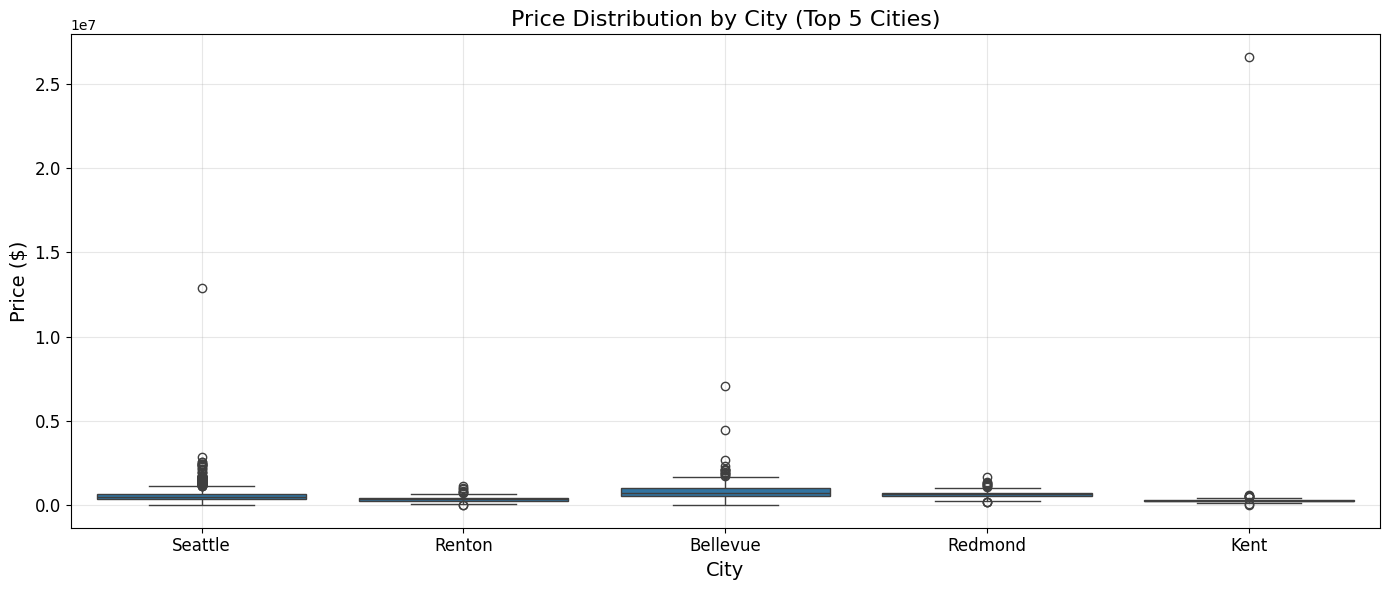

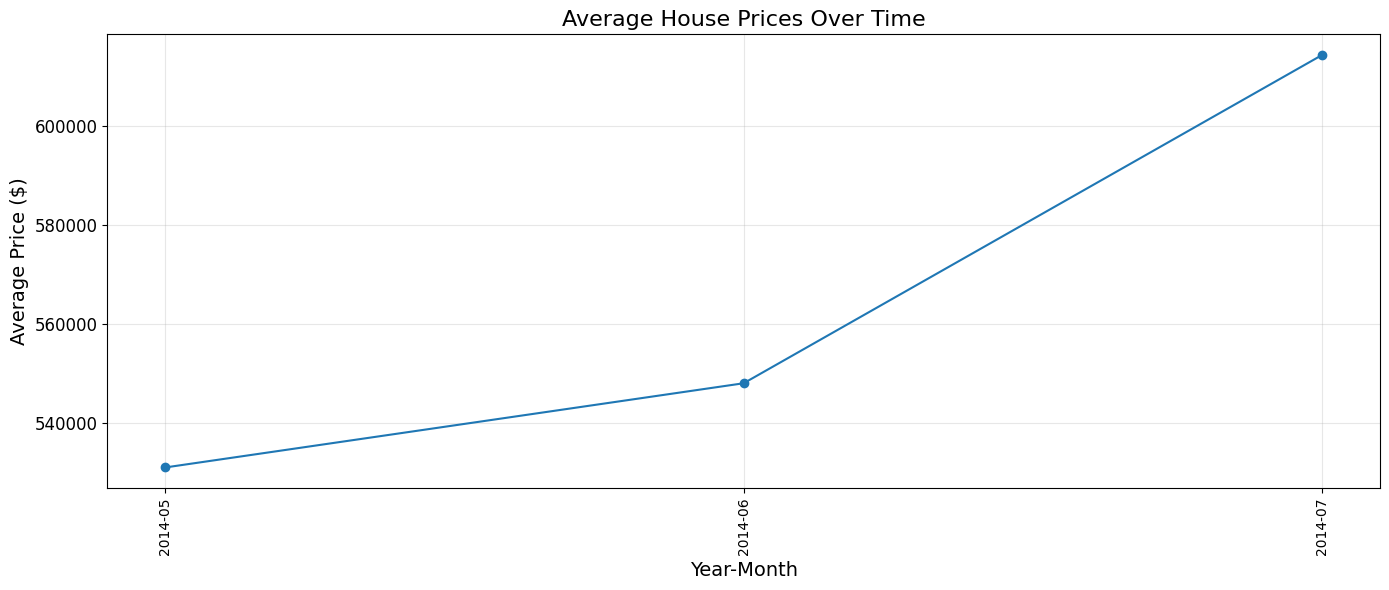

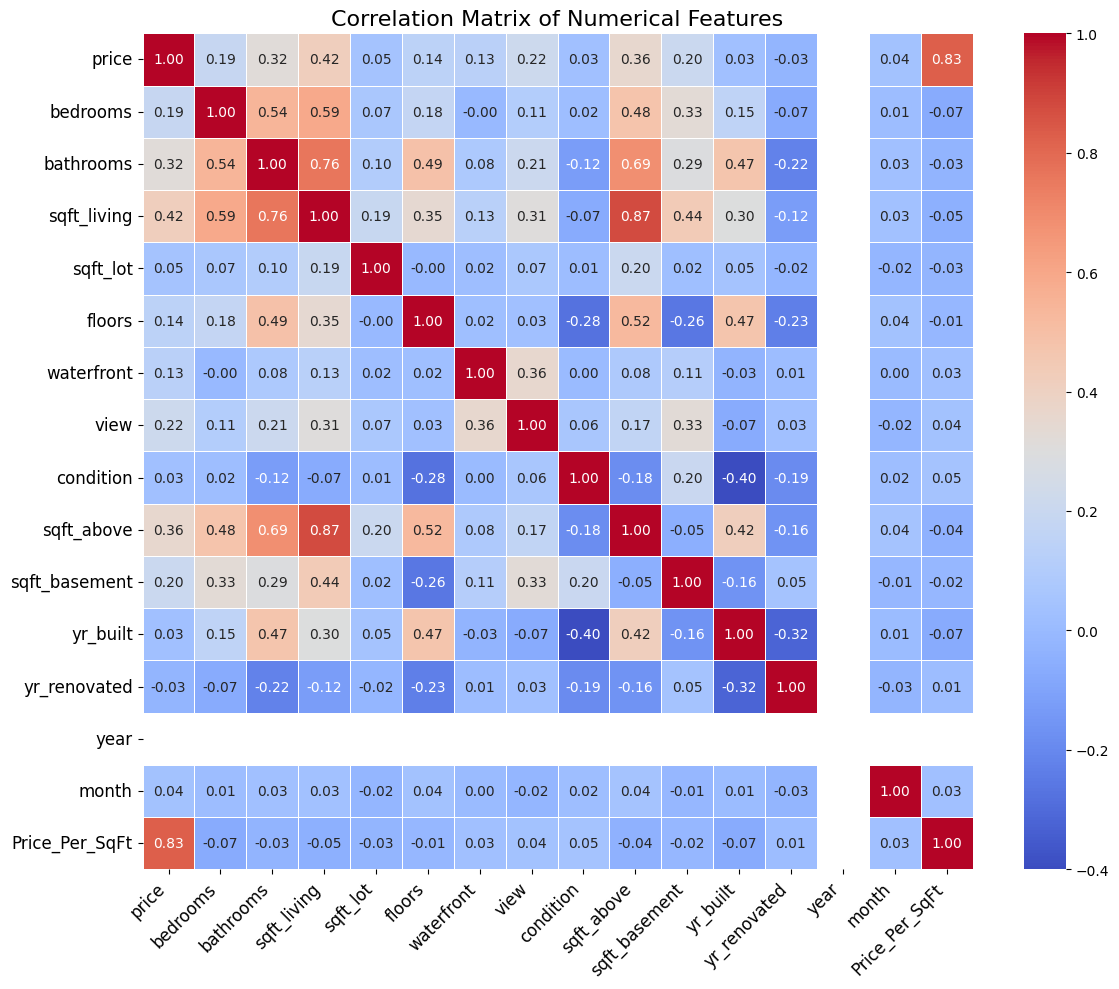

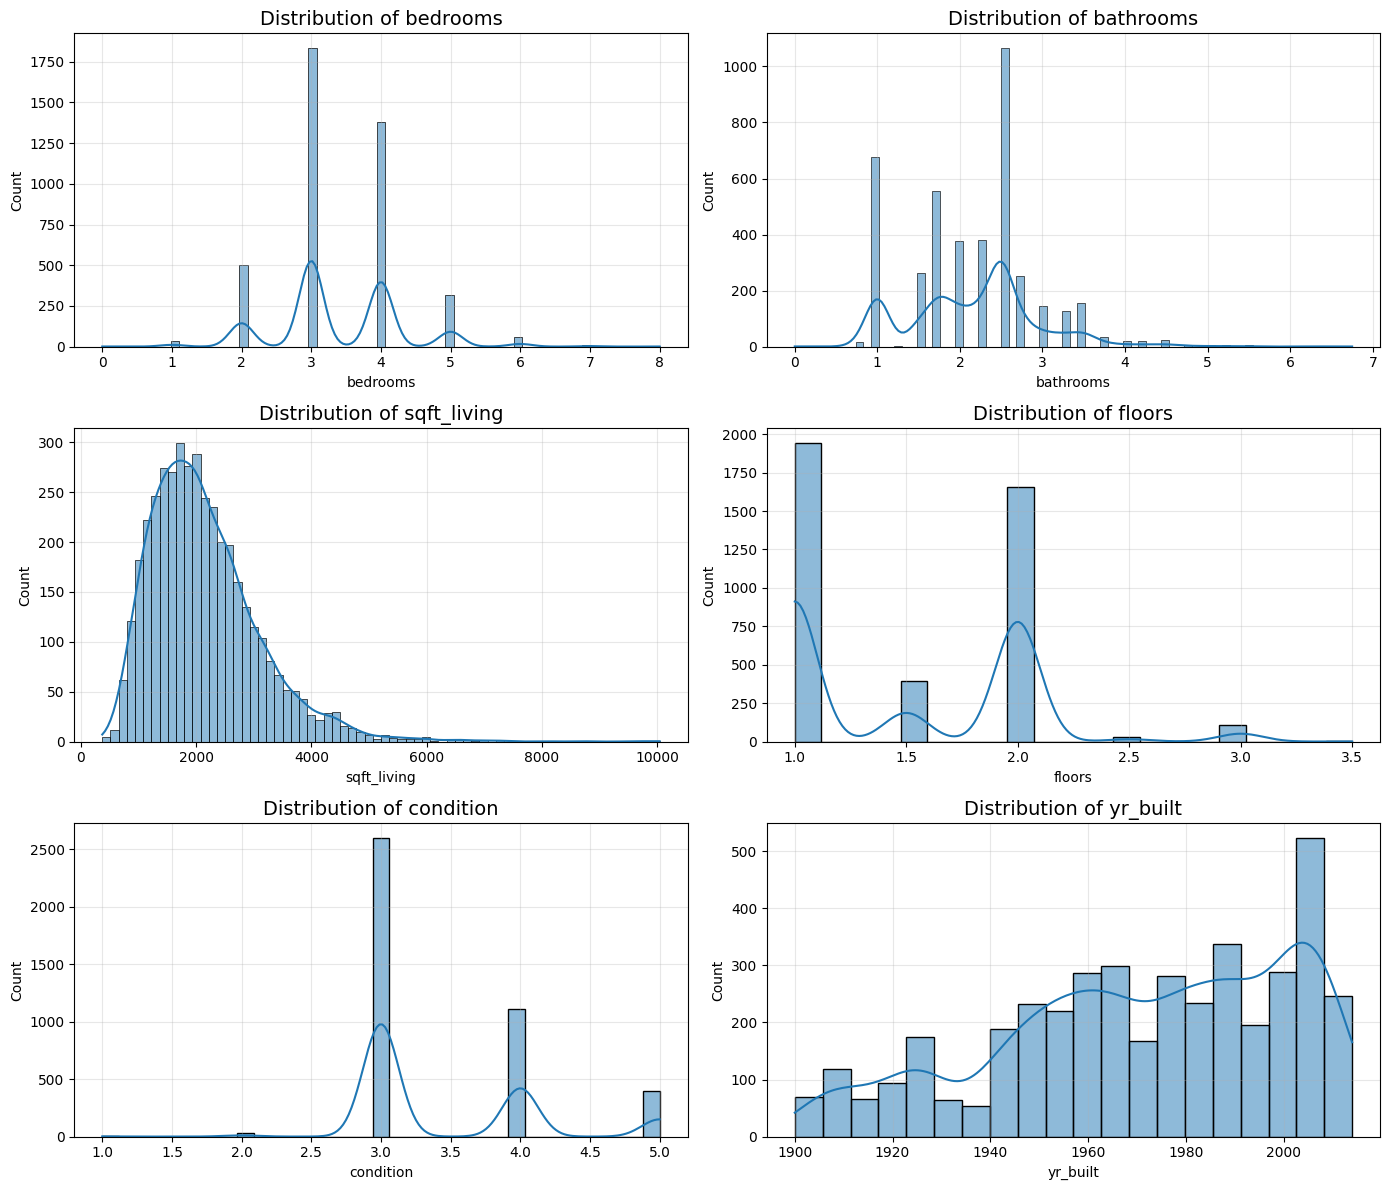

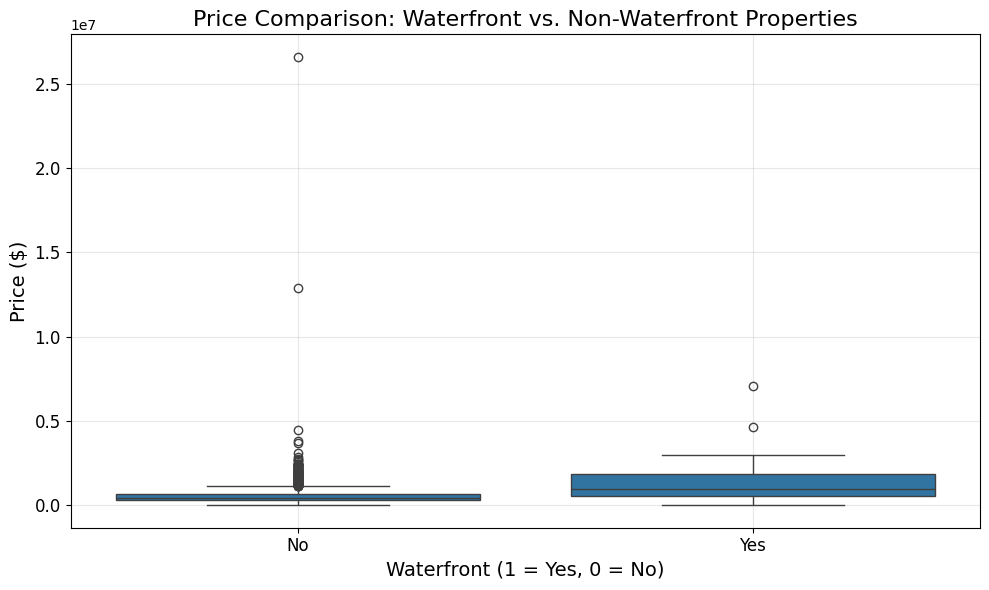

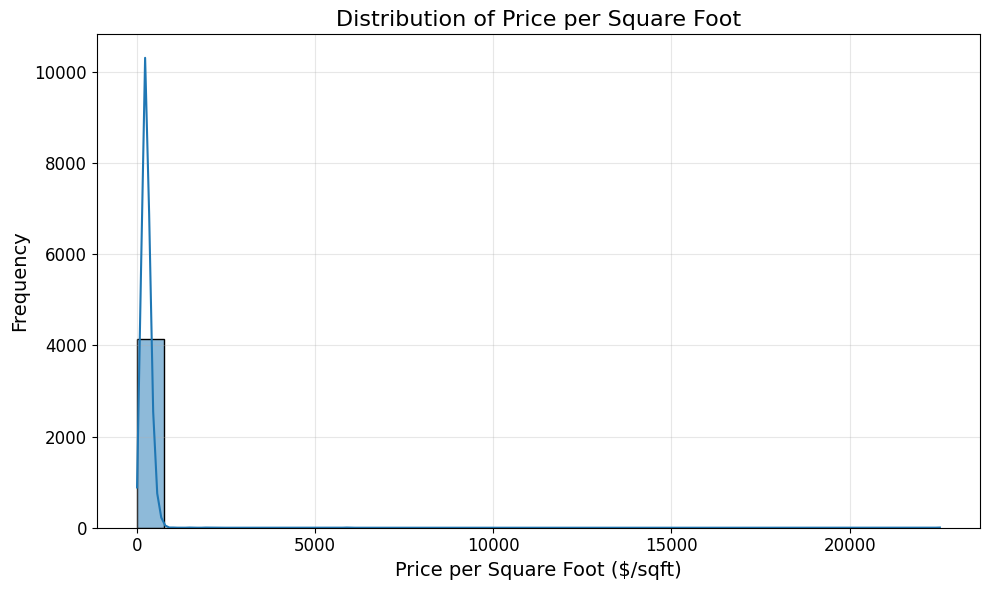

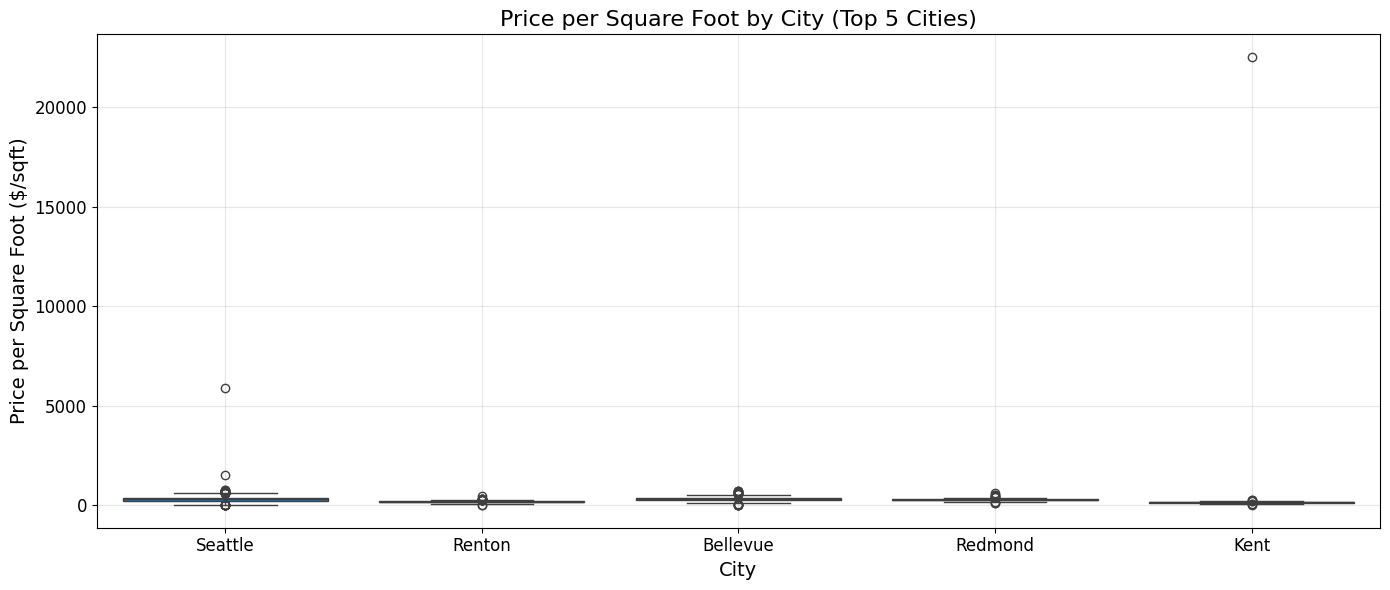

In [6]:

#Average price is $553,063 (range: $0-$26.59M) with extreme right-skew (24.76),
# indicating mostly moderate-priced homes with few luxury properties. Typical
#homes have 3 bedrooms, 2 bathrooms, 2,144 sq ft living space, and 14,698 sq ft lots.
# Construction dates range from 1900-2014 (median: 1976). Premium features are scarce—only
# 0.75% have waterfront access. Property condition averages 3.45/5, and price per square
#foot averages $265.84. The dataset shows high quality with no missing values.



##The price-related visualizations reveal key patterns about home valuations. The
#histogram of house prices shows a strong positive skew, with most properties
# concentrated in the lower to middle price ranges and a long tail of high-priced
#properties, typical of real estate markets where luxury properties command significant
#premiums. The boxplot identifies several significant outliers in the price distribution,
#with a few properties valued above $10 million, and at least one property approaching
#$30 million - these luxury properties are statistical outliers but represent an important
#segment of the market. The boxplot by city shows substantial variation in median prices
#across the top 5 cities, with Bellevue appearing to have both the highest median prices
#and the most expensive outlier properties, while Kent shows lower median prices with fewer
#outliers. Seattle and Redmond also have high median prices, reflecting their desirable
#locations. The scatter plot shows a positive relationship between living area and price,
#though with considerable variability, suggesting other factors significantly influence
#pricing beyond just size.
#The boxplot shows that properties in better condition (4-5 rating) command higher median
#prices, with condition 4 properties showing the widest price range and some of the
#highest-priced outliers, confirming the value of property condition in determining market
#value. The relationship between bedrooms and price isn't strictly linear - while 3-bedroom
#homes generally cost more than 2-bedroom homes, the highest-priced outliers appear in the
#3-bedroom category rather than in homes with more bedrooms, suggesting that other factors
#(location, quality, lot size) may be more important than simply maximizing bedroom count.


##Waterfront has a positive correlation with price (0.13) and view (0.36), confirming that
#waterfront properties command a premium and tend to have better views. The year built shows
#moderate positive correlations with bathrooms (0.47) and floors (0.47), indicating newer
#homes tend to have more bathrooms and more floors. Interestingly, yr_built has a weak
#correlation with price (0.03), suggesting that age alone isn't a strong driver of price.
#Year renovated shows negative correlations with most features, including a -0.32 correlation
# with year built, which makes sense as older homes are more likely to be
# renovated than newer ones. However, renovations don't show a strong
# correlation with price (only -0.03). Surprisingly, sqft_lot has a very weak
# correlation with price (0.05), suggesting that the size of the land isn't as
# important as the size of the home in determining value in this market.



# Generate basic summary statistics
summary_stats = df.describe()
print("Summary Statistics for Numeric Attributes:")
print(summary_stats)

# Calculate additional statistics
numeric_cols = df.select_dtypes(include=['number']).columns

additional_stats = pd.DataFrame(index=numeric_cols)
additional_stats['range'] = df[numeric_cols].apply(lambda x: x.max() - x.min())
additional_stats['mode'] = df[numeric_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
additional_stats['skewness'] = df[numeric_cols].apply(lambda x: x.skew())
additional_stats['kurtosis'] = df[numeric_cols].apply(lambda x: x.kurtosis())

print("\nAdditional Statistics for Numeric Attributes:")
print(additional_stats)

# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if df[col].nunique() < 10:  # Only show for columns with fewer unique values
        print(f"\nFrequency counts for {col}:")
        print(df[col].value_counts().head(10))

# Calculate values for the key insights
# Make sure these column names match exactly with your dataset
try:
    mean_price = df['Price'].mean()
    min_price = df['Price'].min()
    max_price = df['Price'].max()
    std_price = df['Price'].std()

    mean_sqft_living = df['Sqft_Living'].mean()
    min_sqft_living = df['Sqft_Living'].min()
    max_sqft_living = df['Sqft_Living'].max()

    min_yr_built = df['Yr_Built'].min()
    max_yr_built = df['Yr_Built'].max()
    mean_yr_built = df['Yr_Built'].mean()

    median_bedrooms = df['Bedrooms'].median()
    median_bathrooms = df['Bathrooms'].median()

    # Check if 'Waterfront' exists and is a binary field
    if 'Waterfront' in df.columns:
        waterfront_percentage = (df['Waterfront'] == 1).mean() * 100
    else:
        waterfront_percentage = "N/A (Waterfront data not available)"

    # Print the key insights with actual values
    print("\nKey Insights from Summary Statistics:")
    print(f"1. Price Distribution: The average home price is approximately ${mean_price:.2f}, with prices ranging from ${min_price:.2f} to ${max_price:.2f}. The standard deviation of ${std_price:.2f} indicates significant variability in pricing.")
    print(f"2. Property Size: The average living area is {mean_sqft_living:.2f} square feet, with properties ranging from {min_sqft_living:.2f} to {max_sqft_living:.2f} square feet.")
    print(f"3. Building Age: Homes in the dataset were built between {min_yr_built} and {max_yr_built}, with an average construction year of {mean_yr_built:.2f}.")
    print(f"4. Bathrooms and Bedrooms: The typical property has {median_bedrooms} bedrooms and {median_bathrooms} bathrooms.")
    print(f"5. Property Features: Only about {waterfront_percentage if isinstance(waterfront_percentage, str) else f'{waterfront_percentage:.2f}%'} of properties have waterfront views, making this a premium feature in the dataset.")
except Exception as e:
    print(f"\nError calculating key insights: {e}")
    print("Please check that the column names in your dataset match those in the code.")
    print("Your dataset contains these columns:", df.columns.tolist())
# %% [markdown]
# ### 2.2 Identifying Missing Values

# %%
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a dataframe to display both count and percentage of missing values
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Display only columns with missing values
missing_data = missing_data[missing_data['Missing Count'] > 0]

if not missing_data.empty:
    print("Columns with missing values:")
    missing_data
else:
    print("No missing values found in the dataset.")

# %% [markdown]
# ### Strategies for Handling Missing Values:
#
# Based on our analysis of missing data, we propose the following strategies:
#
# 1. **For Missing Renovation Years (Yr_Renovated)**: Many properties have never been renovated, which is likely represented as 0 or NaN. We'll convert any NaN values to 0 to indicate "no renovation."
#
# 2. **For Missing Numerical Data**:
#    - **For Sqft_Basement**: We can impute using the difference between Sqft_Living and Sqft_Above, or with 0 if the property doesn't have a basement.
#    - **For other measurements**: We can use the median value for the neighborhood or property type, as this will be less affected by outliers than the mean.
#
# 3. **For Missing Categorical Data**:
#    - We can use the mode (most frequent value) for the same property type or neighborhood.
#    - For view or condition ratings with missing values, we can use the median rating as a conservative estimate.
#
# 4. **For Properties with Excessive Missing Data**:
#    - If a property is missing more than 50% of its attributes, we might consider removing it from the analysis if the dataset is large enough.

# %%
# Let's implement some of these strategies
# Example: Convert any NaN values in Yr_Renovated to 0
if 'Yr_Renovated' in df.columns:
    df['Yr_Renovated'] = df['Yr_Renovated'].fillna(0)

# For demonstration: Impute missing values in numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        print(f"Imputing missing values in {col} with median")
        df[col] = df[col].fillna(df[col].median())

# For demonstration: Check if there are still missing values after imputation
still_missing = df.isnull().sum()
still_missing = still_missing[still_missing > 0]
if not still_missing.empty:
    print("\nColumns still containing missing values after basic imputation:")
    print(still_missing)
else:
    print("\nNo missing values remain after imputation.")

# %% [markdown]
# ### 2.3 Visualizations to Showcase Trends

# %% [markdown]
# #### 2.3.1 Price Distribution

# %%
# Create a histogram of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Create a boxplot of house prices to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Boxplot of House Prices (Identifying Outliers)', fontsize=16)
plt.ylabel('Price ($)', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.2 Relationship Between Price and Property Features

# %%
# Create a scatter plot of price vs. living area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Price vs. Living Area', fontsize=16)
plt.xlabel('Living Area (square feet)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Create a boxplot of price by number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Create a boxplot of price by property condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Property Condition', fontsize=16)
plt.xlabel('Property Condition (1-5 scale)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.3 Geographic Price Variation

# %%
# Create a boxplot of price by city (top 5 cities by count)
top_5_cities = df['city'].value_counts().nlargest(5).index.tolist()
city_price_data = df[df['city'].isin(top_5_cities)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='price', data=city_price_data, order=top_5_cities)
plt.title('Price Distribution by City (Top 5 Cities)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.4 Time Trends in Housing Prices

# %%
# Extract year and month from the date for time series analysis
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# Create a time series plot of average monthly prices
monthly_avg_prices = df.groupby(['year', 'month'])['price'].mean().reset_index()
monthly_avg_prices['yearmonth'] = monthly_avg_prices['year'].astype(str) + '-' + monthly_avg_prices['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg_prices['yearmonth'], monthly_avg_prices['price'], marker='o', linestyle='-')
plt.title('Average House Prices Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.5 Correlation Analysis

# %%
# Calculate correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.6 Feature Distribution Analysis

# %%
# Create a grid of histograms for key numerical features
key_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'yr_built']
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.7 Impact of Waterfront Property

# %%
# Compare prices of waterfront vs. non-waterfront properties
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Comparison: Waterfront vs. Non-Waterfront Properties', fontsize=16)
plt.xlabel('Waterfront (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# #### 2.3.8 Price per Square Foot Analysis

# %%
# Calculate price per square foot
df['Price_Per_SqFt'] = df['price'] / df['sqft_living']

# Create a histogram of price per square foot
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_Per_SqFt'], kde=True, bins=30)
plt.title('Distribution of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot ($/sqft)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Compare price per square foot across cities
plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='Price_Per_SqFt', data=city_price_data, order=top_5_cities)
plt.title('Price per Square Foot by City (Top 5 Cities)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price per Square Foot ($/sqft)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
